## Ví dụ A.1

In [248]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
y = np.array([[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,1, 1]]).T
print(X.shape)
print(y.shape)


(20, 1)
(20, 1)


In [249]:
def distance(array, value):
  array = np.array(array)
  value = np.array(value)
  return np.linalg.norm(array - value, ord = 2, axis = 1)

In [250]:
def find_nearest_index(array, value, k):
  distance_array = distance(array, value)
  return np.argsort(distance_array)[:k]

In [251]:
np.random.seed(2)
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

X_train = X[:16]
y_train = y[:16]
X_test = X[16:]
y_test = y[16:]
y_pred = [0] * X_test.shape[0]
k = 4
for i in range(X_test.shape[0]):
  idx = find_nearest_index(X_train, X_test[i], k)
  y_pred_i = 0
  for j in range(k):
    y_pred_i +=  y[idx[j]]
  y_pred[i] = 0 if (y_pred_i[0] / k) < 0.5 else 1
print(y_pred)

[1, 1, 1, 0]


In [252]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5


## Ví dụ A.2

In [253]:
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error

In [254]:
def distance(array, value):
  return np.linalg.norm(array - value, axis = 1)

def find_nearest_index(array, value, k):
  distance_array = distance(array, value)
  return np.argsort(distance_array)[:k]

In [255]:
y_new = np.zeros(X.shape[0])
for i in range(len(y_new)):
  if y[i] > 1.0:
    y_new[i] = 1


In [256]:
data = np.loadtxt('/home/vitquay1708/Study_Space/ml/week_3/data/vidu4_lin_reg.txt', skiprows=1)
X = data[:, 1:6]
y = data[:, 6]

In [257]:
X = (X - X.mean(axis=0)) / X.std(axis=0)
threshold = np.median(y)
y_new = (y > threshold).astype(int)

In [258]:
X_train, X_test = X[:80], X[80:]
y_train, y_test = y_new[:80], y_new[80:]

k = 3
y_pred = []
for x in X_test:
  idx = find_nearest_index(X_train, x, k)
  y_pred_i = np.mean(y_train[idx])
  y_pred.append(1 if y_pred_i >= 0.5 else 0)

y_pred = np.array(y_pred)
print(y_pred)


[1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1]


In [259]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')

accuracy_score: 0.5


# Ví dụ B.1

In [260]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data by adding a column of 1s (x_0 = 1)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

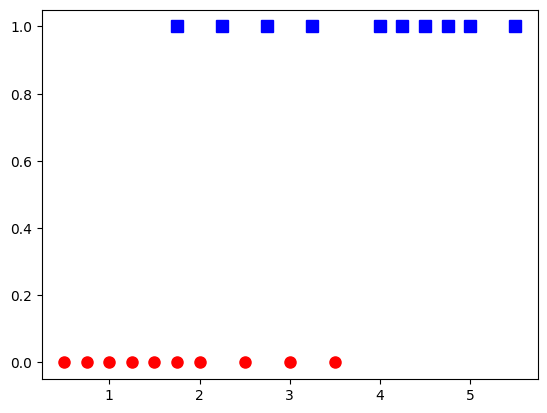

In [261]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.show()

In [262]:
def sigmoid(s):
  return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_it = 10000):
  w = [w_init] # Record of w for converge condition
  it = 0 # time of iteration
  N = X.shape[1] #Number of sample
  d = X.shape[0] #Number of feature
  check_w_after = 20 #Checkpoint

  while it < max_it:
    mix_id = np.random.permutation(N)
    for i in mix_id:
      #Gradient Descent
      xi = X[:, i].reshape(d, 1)
      yi = y[i]
      zi = sigmoid(np.dot(w[-1].T, xi))
      w_new = w[-1] + eta*(yi - zi) * xi
      it += 1
      if it % check_w_after == 0:
        if np.linalg.norm(w_new - w[-check_w_after]) < tol:
          return w
      w.append(w_new)

  return w

In [263]:
eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1)
w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.10961026]
 [ 1.50147718]]


In [264]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03360585 0.04817677 0.06861682 0.09684663 0.13500703 0.18512172
  0.18512172 0.24849486 0.32491245 0.41194823 0.50486284 0.59744278
  0.68356211 0.75869897 0.86947201 0.90650323 0.93382813 0.95357617
  0.96763495 0.98445753]]


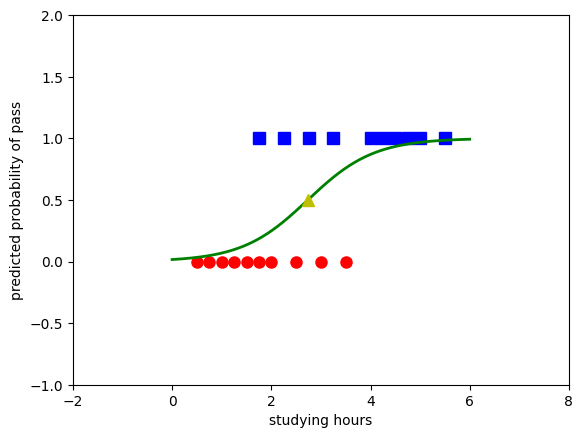

In [265]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

In [266]:
X_test = np.array([[2.45, 1.85, 3.75, 3.21, 4.05]])
X_test = np.concatenate((np.ones((1, X_test.shape[1])), X_test), axis = 0)
y_pred = sigmoid(np.dot(w[-1].T, X_test))
print(y_pred)

[[0.39388967 0.20884898 0.82067526 0.67043021 0.87775844]]


# Ví dụ B.2

In [267]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(22)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


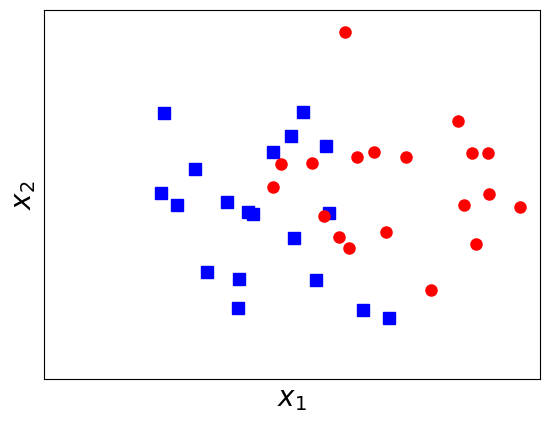

In [268]:
means = [[2, 2], [4, 2]]
cov = [[0.7, 0], [0, 0.7]]
N = 20
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# save the figure to an image first
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

In [269]:
X = np.concatenate((X1, X2), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1) # initialize parameters w = w_init
# call logistic_sigmoid_regression procedure
w = logistic_sigmoid_regression(X, y, w_init, eta)
# print out the parameter
print(w[-1])

[[-9.51043127]
 [ 2.25978315]
 [ 1.42588178]]


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


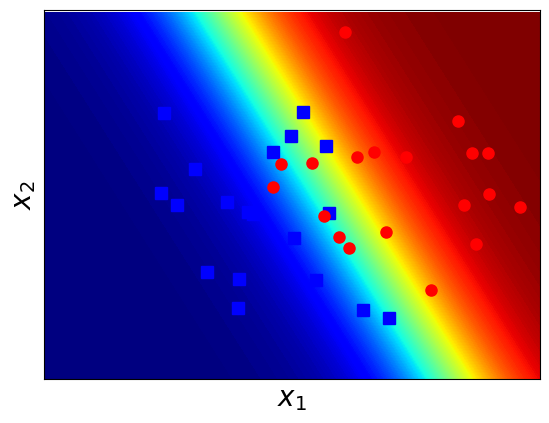

In [270]:
# Make data.
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)
# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)
# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher & vise versa
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')
# finally, plot the data and take a look
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()

# Ví dụ B.3: (Bài tập 1)

In [271]:
def sigmoid(s):
  return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_it = 10000):
  w = [w_init] # Record of w for converge condition
  it = 0 # time of iteration
  N = X.shape[0] #Number of sample
  d = X.shape[1] #Number of feature
  check_w_after = 20 #Checkpoint

  while it < max_it:
    mix_id = np.random.permutation(N)
    for i in mix_id:
      #Gradient Descent
      xi = X[i, :].reshape(d, 1)
      yi = y[i]
      zi = sigmoid(np.dot(w[-1].T, xi))
      w_new = w[-1] + eta*(yi - zi) * xi
      it += 1
      if it % check_w_after == 0:
        if np.linalg.norm(w_new - w[-check_w_after]) < tol:
          return w
      w.append(w_new)

  return w

In [272]:
import numpy as np
import pandas as pd

data = pd.read_csv('/home/vitquay1708/Study_Space/ml/week_4/data/Admission_Predict.csv')

In [273]:
sn = data['Serial No.'].tolist()

gre = data['GRE Score'].tolist()
X1 = np.asarray([gre])

tfl = data['TOEFL Score'].tolist()
X2 = np.asarray([tfl])

unirt = data['University Rating'].tolist()
X3 = np.asarray([unirt])

sop = data['SOP'].tolist()
X4 = np.asarray([sop])

lor1 = data['LOR '].tolist()
X5 = np.asarray([lor1])

cgpa1 = data['CGPA'].tolist()
X6 = np.asarray([cgpa1])

research_exp = data['Research'].tolist()
X7 = np.asarray([research_exp])

prob_Admit = data['Chance of Admit'].tolist()
Yt = np.asarray(prob_Admit)
print(len(Yt))
# printing list data

400


In [274]:
X = np.concatenate((X1.T, X2.T, X3.T, X4.T, X5.T, X6.T, X7.T), axis = 1)
X = (X - X.mean(axis = 0)) / X.std(axis = 0) #Normalizing data
print(X)
y = Yt
print(y[0])

[[ 1.76210664  1.74697064  0.79882862 ...  1.16732114  1.76481828
   0.90911166]
 [ 0.62765641 -0.06763531  0.79882862 ...  1.16732114  0.45515126
   0.90911166]
 [-0.07046681 -0.56252785 -0.07660001 ...  0.05293342 -1.00563118
   0.90911166]
 ...
 [ 1.15124883  1.41704229  0.79882862 ...  1.16732114  1.42900622
   0.90911166]
 [-0.41952842 -0.72749202 -0.07660001 ...  0.61012728  0.30403584
  -1.09997489]
 [ 1.41304503  1.58200646  0.79882862 ...  0.61012728  1.78160888
   0.90911166]]
0.92


In [275]:
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
X_train, X_test = X[:350, :], X[350:, :]
y_train, y_test = y[:350], y[350:]
print(y_train.shape, y_test.shape)

(350,) (50,)


In [276]:
eta = 0.05
d = X_train.shape[1]
w_init = np.random.randn(d, 1)
w = logistic_sigmoid_regression(X_train, y_train, w_init, eta)
print(len(w[-1]))

8


In [277]:
y_pred = sigmoid(np.dot(X_test, w[-1]))
y_pred_label = (y_pred >= 0.75).astype(int)
y_test_label = (y_test >= 0.75).astype(int)
print(y_pred)

[[0.71961322]
 [0.80205293]
 [0.61511321]
 [0.59876478]
 [0.51260425]
 [0.68230151]
 [0.80201037]
 [0.59930872]
 [0.55594203]
 [0.68472627]
 [0.79965542]
 [0.88462591]
 [0.88912316]
 [0.6567561 ]
 [0.76753437]
 [0.83899766]
 [0.73752154]
 [0.50759444]
 [0.47804915]
 [0.58137624]
 [0.63600276]
 [0.82297816]
 [0.89995734]
 [0.75269705]
 [0.58123502]
 [0.53580303]
 [0.43757564]
 [0.45904742]
 [0.50193739]
 [0.65830375]
 [0.78392383]
 [0.75909094]
 [0.83435722]
 [0.63630145]
 [0.90680547]
 [0.91785455]
 [0.59670171]
 [0.65327709]
 [0.50849108]
 [0.75297749]
 [0.64680371]
 [0.74769735]
 [0.8359342 ]
 [0.72830775]
 [0.84990197]
 [0.81604556]
 [0.81870385]
 [0.88156121]
 [0.7460317 ]
 [0.89301607]]


In [278]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
print(f'Accuracy: {accuracy_score(y_test_label, y_pred_label)}')
print(f'Recall: {recall_score(y_test_label, y_pred_label)}')
print(f'Precision: {precision_score(y_test_label, y_pred_label)}')

Accuracy: 0.92
Recall: 0.9090909090909091
Precision: 0.9090909090909091


## Hồi quy tuyến tính

In [279]:
w_linear = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_pred_lin = X_test @ w_linear
mse = np.mean((y_pred_lin - y_test) ** 2)
print(mse)

0.004641678440367157


# Naive Bayes 

In [280]:
def nb_fit(X_train, y_train):
  classes = np.unique(y_train)
  means = {}
  vars = {}
  priors = {}

  for c in classes:
    X_c = X_train[y_train == c]
    means[c] = X_c.mean(axis = 0)
    vars[c] = X_c.var(axis = 0)
    priors[c] = X_c.shape[0] / X_train.shape[0]

  return means, vars, priors, classes 

def gaussian_prob(x, mean, var):
  eps = 1e-6
  coeff = 1 / np.sqrt(2 * np.pi * var + eps)
  exponent = np.exp( - (x - mean) ** 2 / (2 * var + eps))
  return coeff * exponent

def nb_predict(X_test, means, vars_, priors, classes):
    y_pred = []
    for x in X_test:
        posteriors = []
        for c in classes:
            prior = np.log(priors[c])
            class_conditional = np.sum(np.log(gaussian_prob(x, means[c], vars_[c])))
            posterior = prior + class_conditional
            posteriors.append(posterior)
        y_pred.append(classes[np.argmax(posteriors)])
    return np.array(y_pred)

In [281]:
y_train_nb = (y_train >= 0.75).astype(int)
y_test_nb = (y_test >= 0.75).astype(int)
means, vars, priors, classes = nb_fit(X_train, y_train_nb)
y_pred_nb = nb_predict(X_test, means, vars, priors, classes)
print(y_pred_nb)

[0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 0 0 1 0 0 1 0 1 1 1 1 0 1]


In [282]:
print(f'Accuracy: {accuracy_score(y_test_label, y_pred_nb)}')
print(f'Recall: {recall_score(y_test_label, y_pred_nb)}')
print(f'Precision: {precision_score(y_test_label, y_pred_nb)}')

Accuracy: 0.9
Recall: 0.8181818181818182
Precision: 0.9473684210526315


# Thư viện sklearn

In [283]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(penalty=None)
y_train = (y_train > 0.75).astype(int)
y_test = (y_test > 0.75).astype(int)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
print(logr.coef_)

print(accuracy_score(y_test, y_pred))

[[-0.45533731  0.60141981  0.49030158  0.56409821  0.4870616   0.55902145
   2.34845219  0.39267865]]
0.9


# Ví dụ B.4 (Bài tập 2)


In [284]:
import pandas as pd
import numpy as np

In [285]:
df = pd.read_csv('/home/vitquay1708/Study_Space/ml/week_4/data/banking.csv')
df.isna().sum()
# print(df.head())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [286]:
nominal_cols = ['job','marital','education','default','housing','loan','contact','poutcome']
df = pd.get_dummies(df, columns=nominal_cols)

In [287]:
month_map = {m:i+1 for i,m in enumerate(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])}
df['month'] = df['month'].map(month_map)

day_map = {d:i+1 for i,d in enumerate(['mon','tue','wed','thu','fri'])}
df['day_of_week'] = df['day_of_week'].map(day_map)

In [ ]:
y = df['y']
print(y.unique())
X = df.drop('y', axis = 1)
X = X.dropna(how='any', axis = 0)
y = y.dropna(how='any', axis = 0)

[0 1]


In [289]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

## Logistic Regression

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=47)
logr = LogisticRegression(penalty='l2', max_iter=10000)
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')

accuracy_score: 0.8620218579234973


## Naive Bayes

In [297]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')

accuracy_score: 0.8565573770491803


# Ví dụ B.6 (Bài tập 3)

In [298]:
df = pd.read_csv('/home/vitquay1708/Study_Space/ml/week_4/data/framingham.csv')
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [299]:
df = df.dropna(how='any', axis = 0)

In [300]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101010)
logr = LogisticRegression(penalty='l2', max_iter=10000)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)



In [301]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')

Accuracy: 0.8523245214220602
Recall: 0.0935672514619883
Precision: 0.6956521739130435
